In [31]:
import requests
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

response = requests.get(f'http://localhost:8080/sql/players').json()
players_df = pd.DataFrame(response)

players_df = players_df.dropna(subset=['marketValueInEur'])
players_df['dateOfBirth'] = pd.to_datetime(players_df['dateOfBirth'])
players_df = players_df.drop(columns=['lastSeason', 'currentClubId', 'playerCode', 'contractExpirationDate', 'agentName', 'imageUrl', 'url', 'currentClubDomesticCompetitionId', 'currentClubId', 'currentClubName', 'currentClubId'])

In [31]:
year = '2022'
response = requests.get(f'http://localhost:8080/mongo/appearances?year={year}').json()
appearances_df = pd.DataFrame(response)
appearances_df

In [32]:
current_date = datetime.now()
players_df['age'] = np.floor((current_date - players_df['dateOfBirth']) / pd.Timedelta('365 days'))
players_df

,id,firstName,lastName,playerName,countryOfBirth,cityOfBirth,countryOfCitizenship,dateOfBirth,subPosition,position,foot,heightInCm,marketValueInEur,highestMarketValueInEur,age
7,4042,Brad,Jones,Brad Jones,Australia,Armadale,Australia,1982-03-19,Goalkeeper,Goalkeeper,left,194.0,100000.0,2000000.0,41.0
33,8187,Juanmi,Callejón,Juanmi Callejón,Spain,Motril,Spain,1987-02-11,Left Winger,Attack,right,180.0,200000.0,1000000.0,36.0
72,18922,Karim,Benzema,Karim Benzema,France,Lyon,France,1987-12-19,Centre-Forward,Attack,right,185.0,25000000.0,60000000.0,36.0
89,22860,Jesper,Hansen,Jesper Hansen,Denmark,Slangerup,Denmark,1985-03-31,Goalkeeper,Goalkeeper,right,188.0,200000.0,1000000.0,38.0
93,23365,None,Reginaldo,Reginaldo,Brazil,Jundiaí,Brazil,1983-07-31,Centre-Forward,Attack,right,175.0,10000.0,3500000.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka,Bijol,Jaka Bijol,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190.0,10000000.0,10000000.0,24.0
30298,537171,Semuel,Pizzignacco,Semuel Pizzignacco,Italy,Monfalcone,Italy,2001-09-01,Goalkeeper,Goalkeeper,right,188.0,325000.0,350000.0,22.0
30299,586756,Festy,Ebosele,Festy Ebosele,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180.0,4500000.0,4500000.0,21.0
30300,704692,Nicolò,Cocetta,Nicolò Cocetta,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,None,NaN,75000.0,75000.0,20.0


In [33]:
players_df.shape

(19383, 15)

In [34]:
players_df.dtypes

id                                  int64
firstName                          object
lastName                           object
playerName                         object
countryOfBirth                     object
cityOfBirth                        object
countryOfCitizenship               object
dateOfBirth                datetime64[ns]
subPosition                        object
position                           object
foot                               object
heightInCm                        float64
marketValueInEur                  float64
highestMarketValueInEur           float64
age                               float64
dtype: object

In [35]:
players_df['position'].unique()

array(['Goalkeeper', 'Attack', 'Midfield', 'Defender', 'Missing'],
      dtype=object)

# Distribuzione dei giocatori per eta' e valore di mercato

C:\Users\zhoua\miniconda3\envs\ium\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\zhoua\miniconda3\envs\ium\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


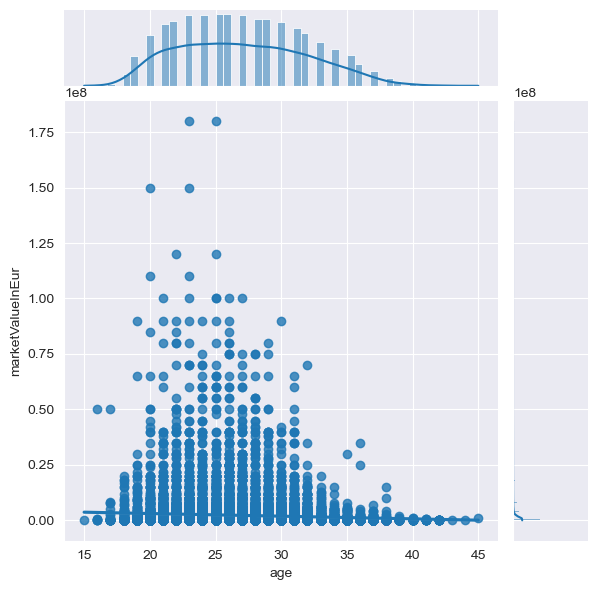

In [36]:
sns.jointplot(data=players_df, x='age', y='marketValueInEur', kind='reg')

Ci siamo chiesti come fossero distribuiti i giocatori in base alla loro eta' e il loro valore di mercato. Grazie a questo grafico possiamo vedere che la maggior parte di giocatori hanno un'eta' compresa tra i 20 e i 30 anni e che il loro valore di mercato tende a crescere quando sono giovani, fino ad intorno ai 25 anni, e inizia poi a declinare superata questa soglia. 

# Valore dei giocatori in base all'età

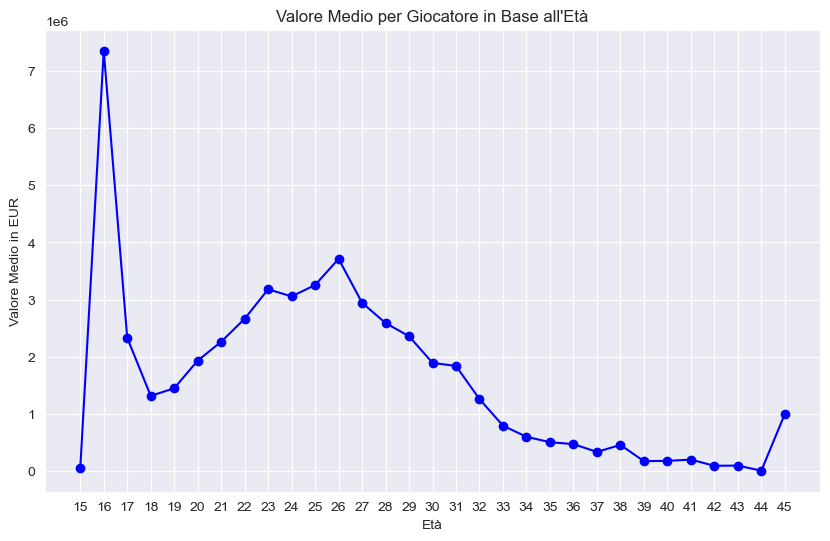

In [40]:
age_value_df = players_df[['age', 'marketValueInEur']]

# Rimuovi le righe con valori mancanti
age_value_df = age_value_df.dropna()

# Calcola il valore medio per giocatore in base all'età
avg_value_by_age = age_value_df.groupby('age')['marketValueInEur'].mean().reset_index()

# Crea il grafico lineare
plt.figure(figsize=(10, 6))
plt.plot(avg_value_by_age['age'], avg_value_by_age['marketValueInEur'], marker='o', linestyle='-', color='b')

plt.xticks(avg_value_by_age['age'])

# Aggiungi etichette e titolo
plt.title('Valore Medio per Giocatore in Base all\'Età')
plt.xlabel('Età')
plt.ylabel('Valore Medio in EUR')

# Mostra il grafico
plt.grid(True)
plt.show()

Andiamo ora a vedere in dettaglio il valore medio dei giocatori in relazione alla loro eta'. Da questo line chart possiamo confermare cio' che abbiamo osservato precedentemente, ovvero che il loro valore tende a crescere fino a circa 26 anni e inizia poi a declinare. Possiamo osservare anche una anomalia nei giocatori con 16 anni di eta', questo perche' nel dataset abbiamo una bassa quantita' di giocatori in questa fascia di eta', portando a un valore medio inflazionato.


# Goal medi per partita in base all'età

Passiamo ora ad analizzare la performance dei giocatori in relazione alla loro eta'. Non avendo altre metriche utili alla valutazione della performance, utilizziamo in il numero di goal segnati in media per partita, percio' analizzeremo solo gli attaccanti.

# Confronto tra goal e valore in base all'età

Confronto i due grafici 

# Correlazione tra valore e goal medi per partita

Desc

# Valore medio per posizione di giocatori locali e stranieri (violin plot)

Desc

# Eventi per posizione (stacked bar)

Desc